In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Customer-Churn-Records.csv')
df.shape

(10000, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [7]:
df.isna().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [9]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [11]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,0,2,SILVER,206
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,0,3,GOLD,251
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,0,3,GOLD,342


## EDA

In [24]:
catcols = [x for x in df.columns if df[x].dtype == 'object' and x != 'Surname']
catcols

['Geography', 'Gender', 'Card Type']

In [26]:
num_features = len(catcols)
rows = np.ceil(np.sqrt(num_features)).astype(int)
cols = np.ceil(num_features / rows).astype(int)
print(rows,cols)

2 2


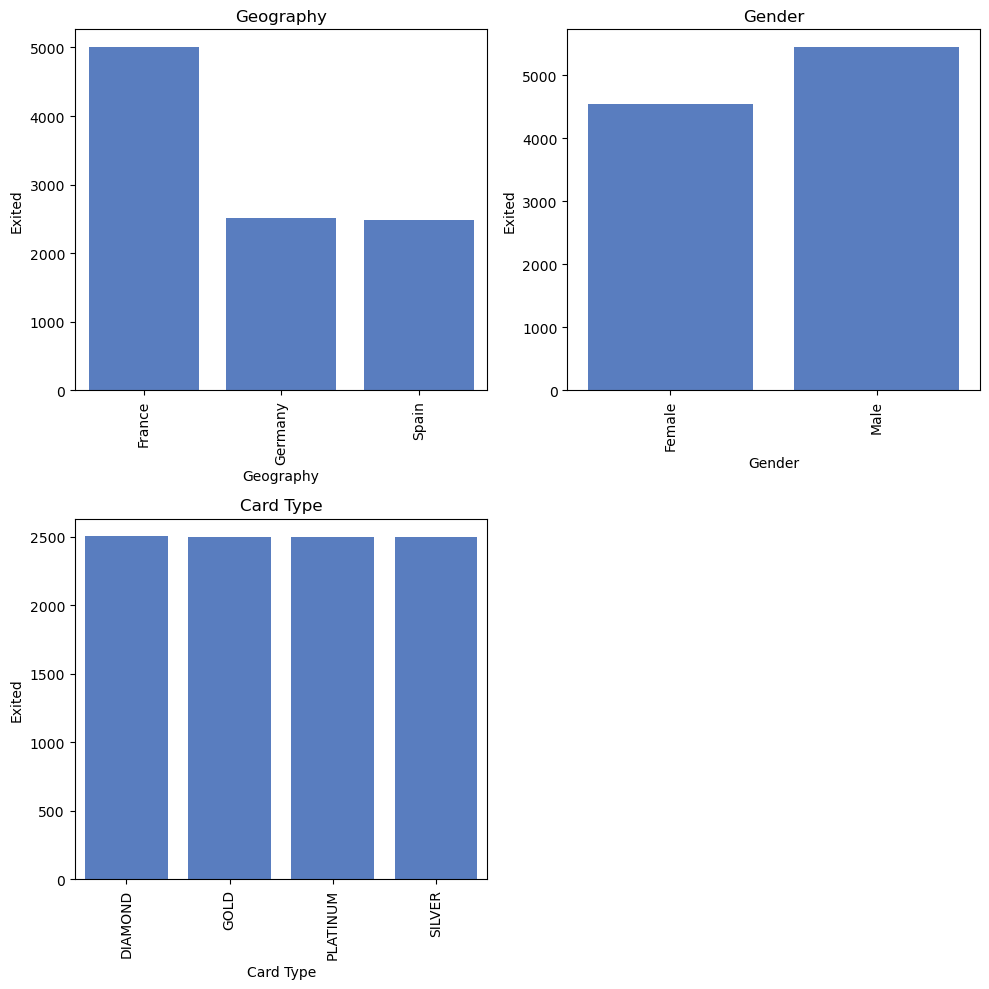

In [40]:
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))  # Dynamic figure size
axes = axes.flatten()

for i, feature in enumerate(catcols):
    grp_df = df.groupby(feature)['Exited'].count().reset_index()
    sns.barplot(data=grp_df, y='Exited', x=feature, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].tick_params(axis='x', rotation=90)

# Turn off unused axes
for i in range(len(catcols), len(axes)):
    axes[i].axis('off') 
plt.tight_layout()
plt.show()

### Numerical Features

In [43]:
numcols = [x for x in df.columns if df[x].dtypes != 'object']
numcols

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Complain',
 'Satisfaction Score',
 'Point Earned']

In [45]:
num_features = len(numcols)
rows = np.ceil(np.sqrt(num_features)).astype(int)
cols = np.ceil(num_features / rows).astype(int)
print(rows,cols)

4 4


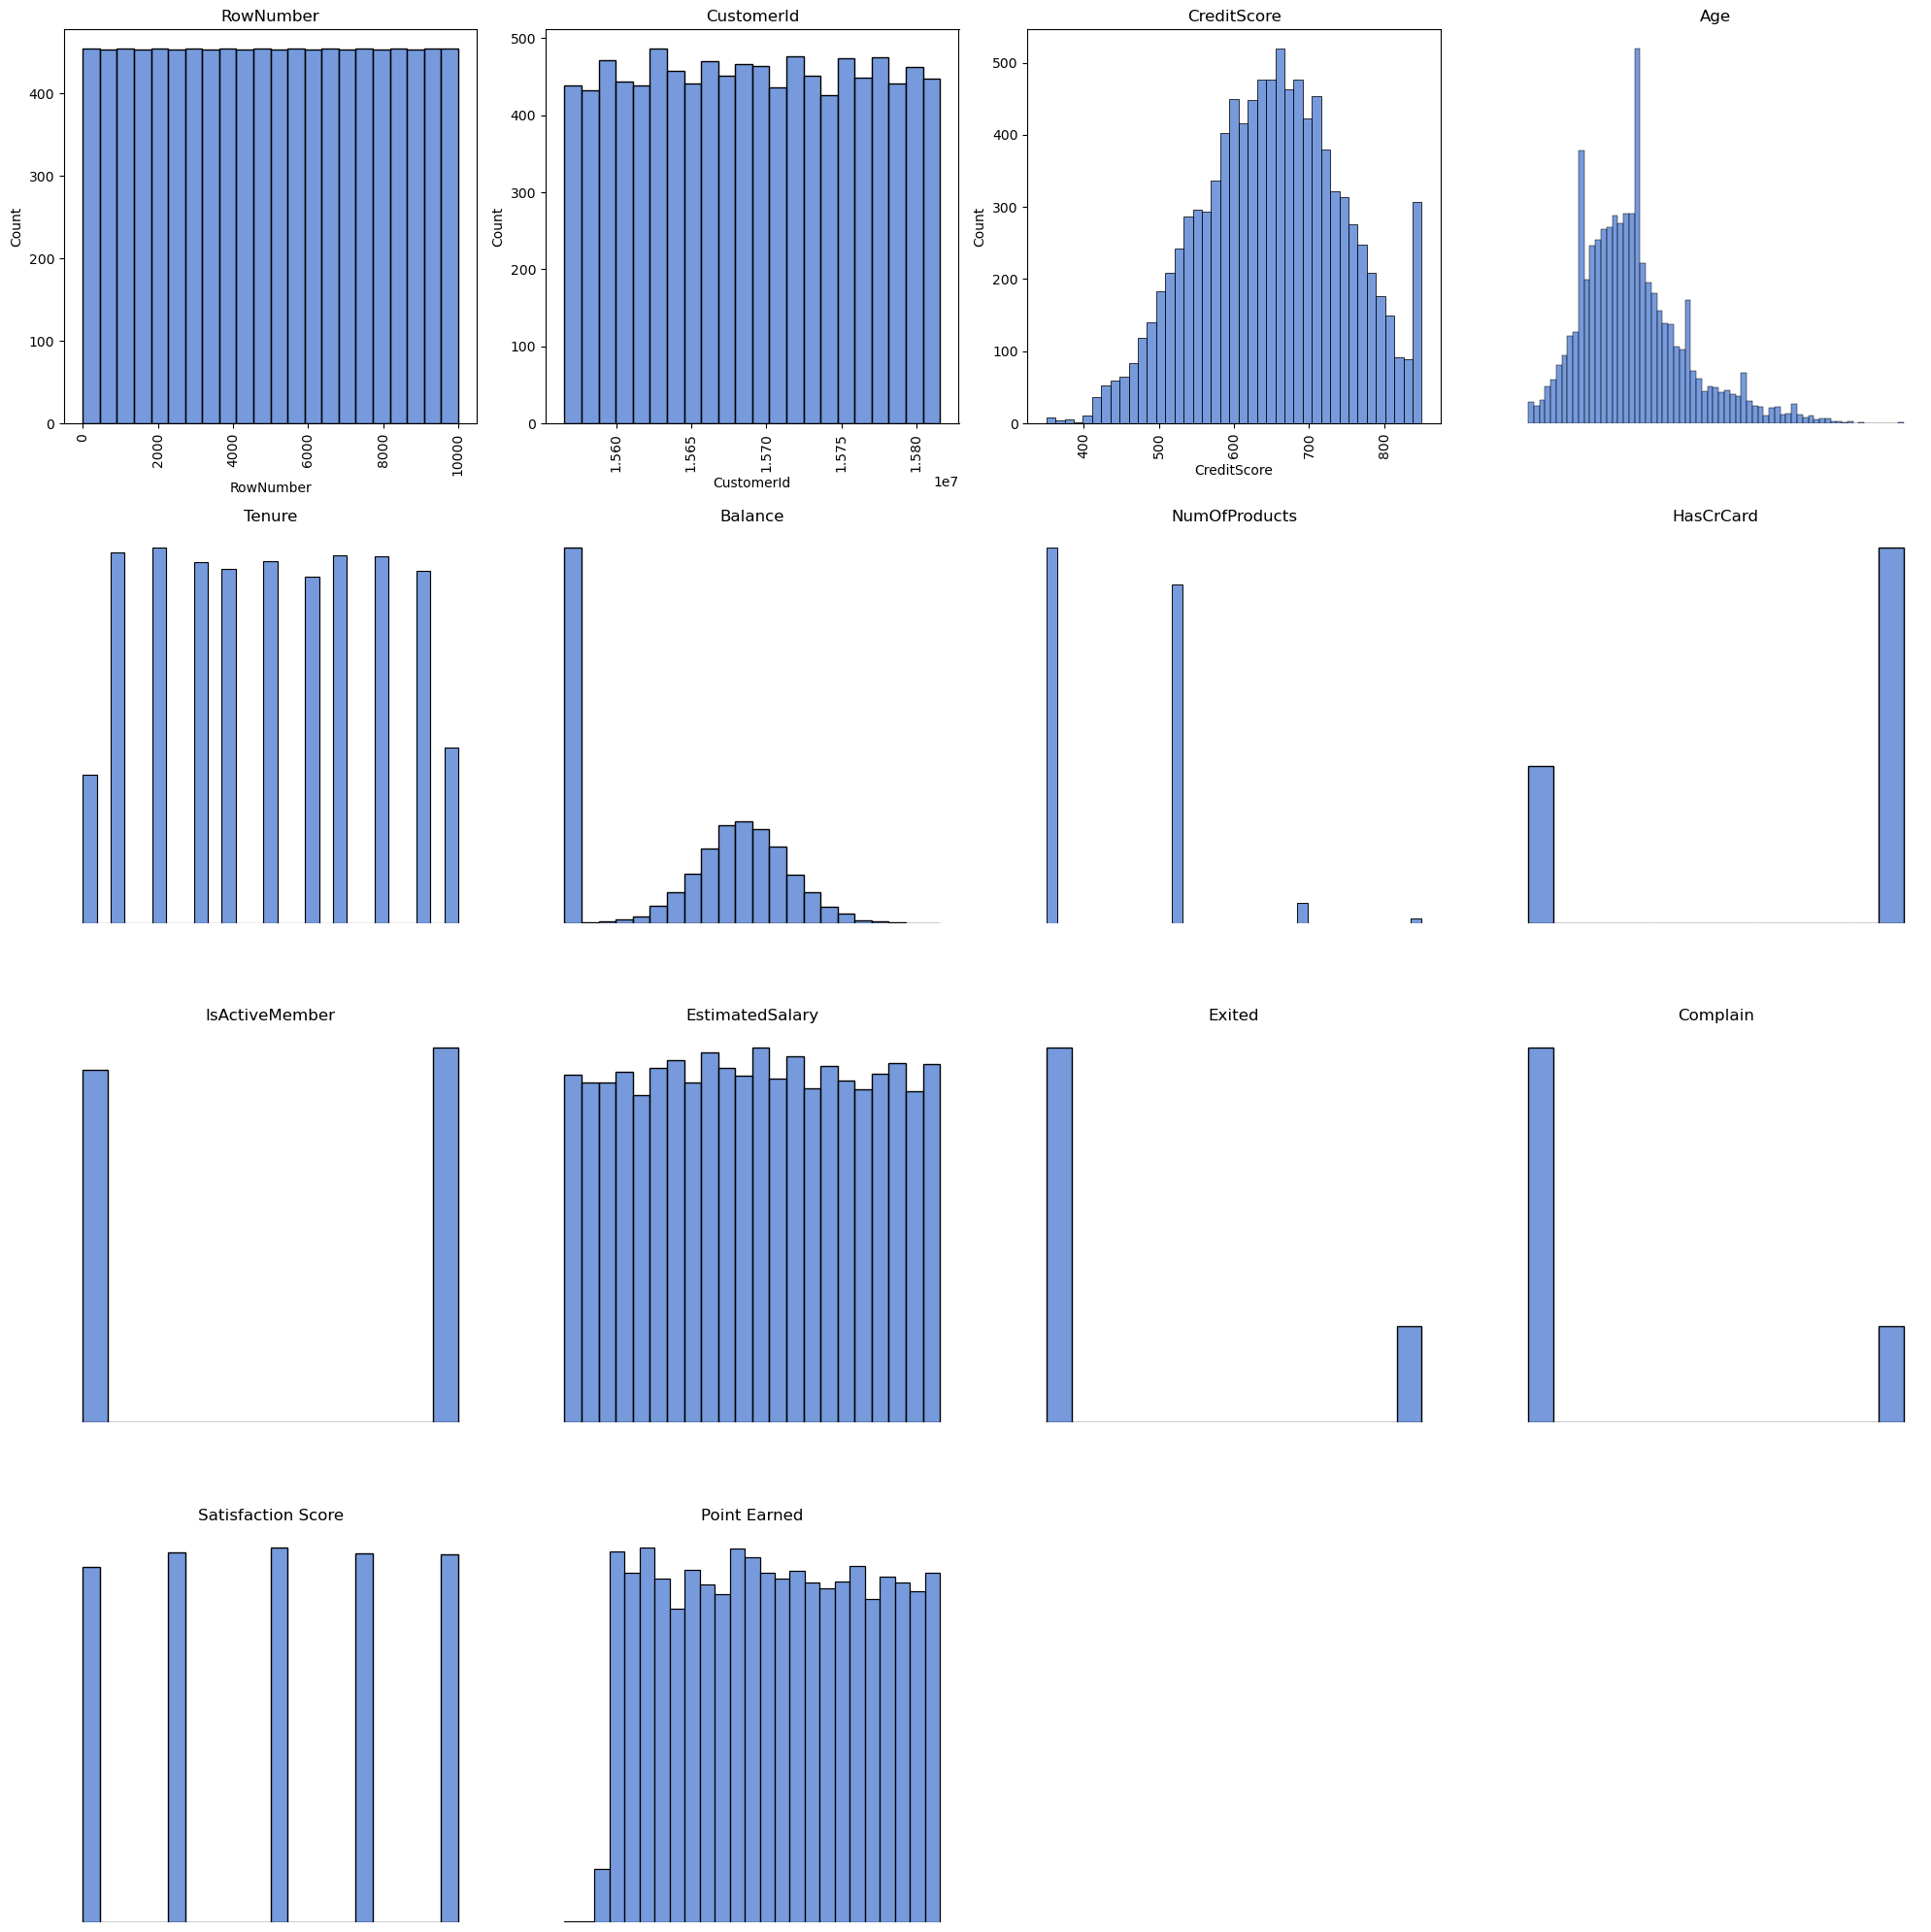

In [47]:
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))  # Dynamic figure size
axes = axes.flatten()

for i, feature in enumerate(numcols):
    sns.histplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].tick_params(axis='x', rotation=90)

# Turn off unused axes
for i in range(len(catcols), len(axes)):
    axes[i].axis('off') 
plt.tight_layout()
plt.show()

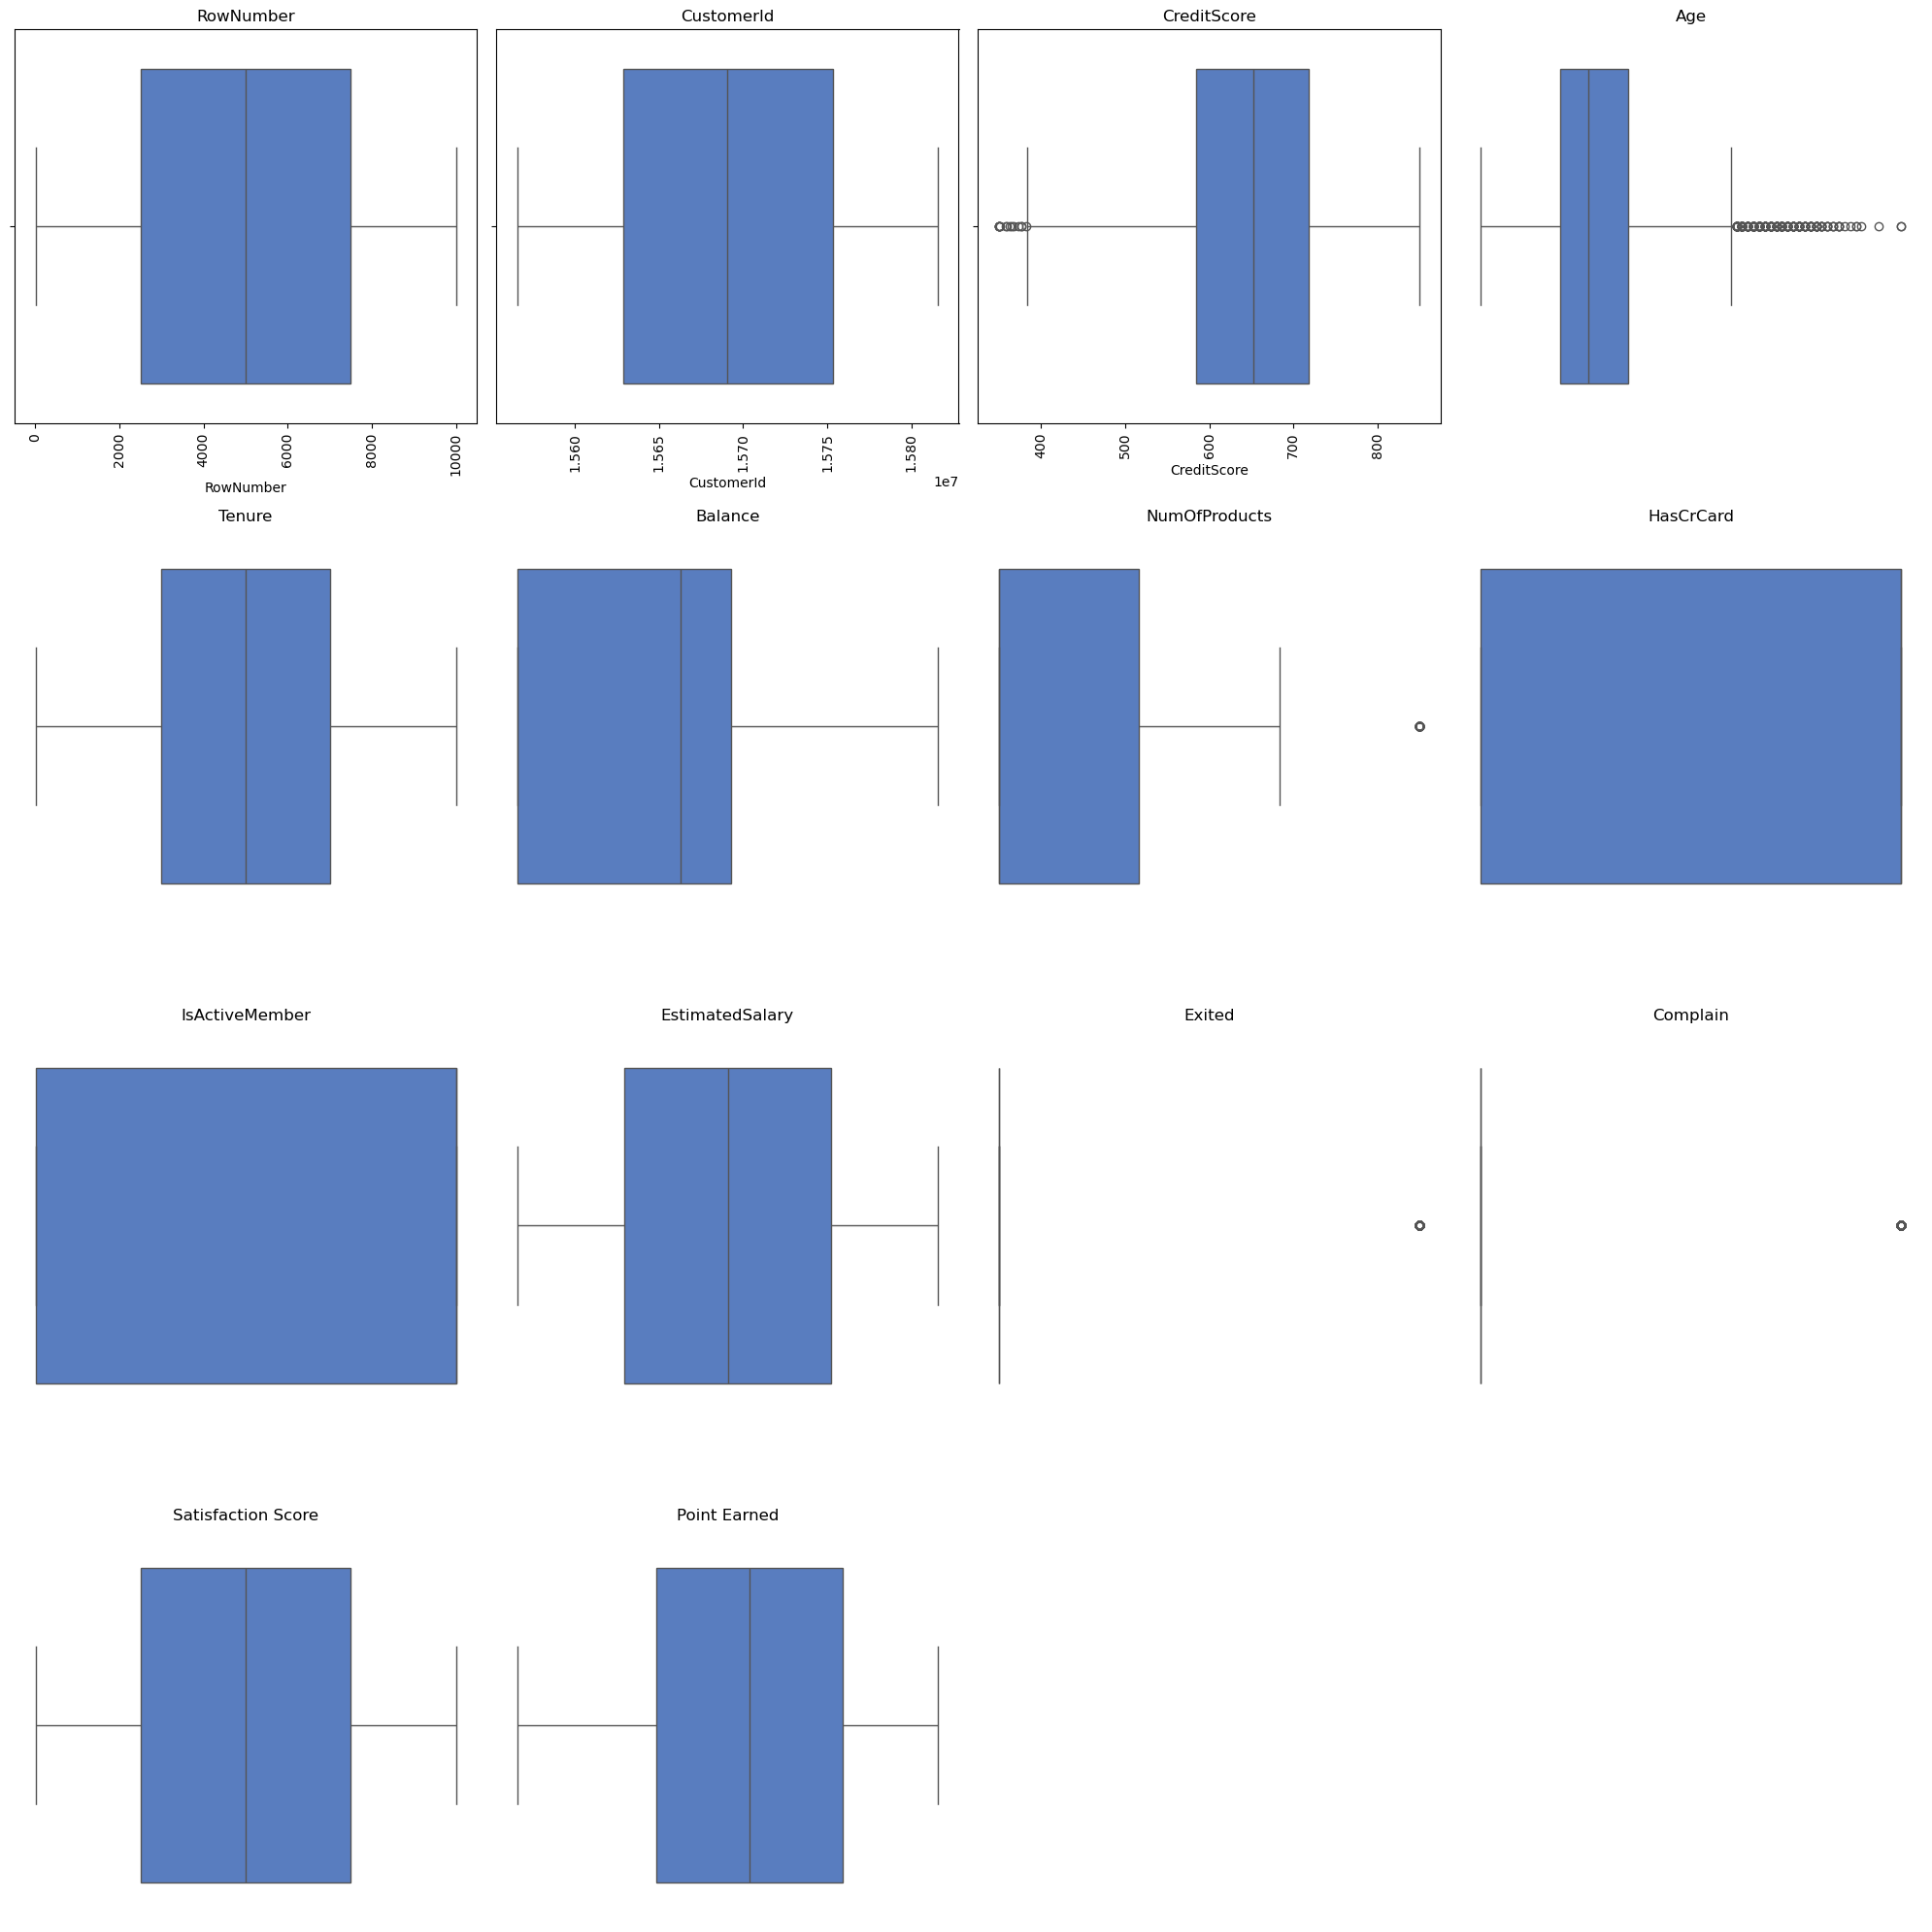

In [49]:
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))  # Dynamic figure size
axes = axes.flatten()

for i, feature in enumerate(numcols):
    sns.boxplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].tick_params(axis='x', rotation=90)

# Turn off unused axes
for i in range(len(catcols), len(axes)):
    axes[i].axis('off') 
plt.tight_layout()
plt.show()

In [75]:
numcols = [x for x in df.columns if df[x].dtypes != 'object' and x != 'RowNumber' and x !='CustomerId' and x!= 'Exited']
numcols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Complain',
 'Satisfaction Score',
 'Point Earned']

In [83]:
num_features = len(numcols)
rows = np.ceil(np.sqrt(num_features)).astype(int)
cols = np.ceil(num_features / rows).astype(int)
print(rows,cols)

4 3


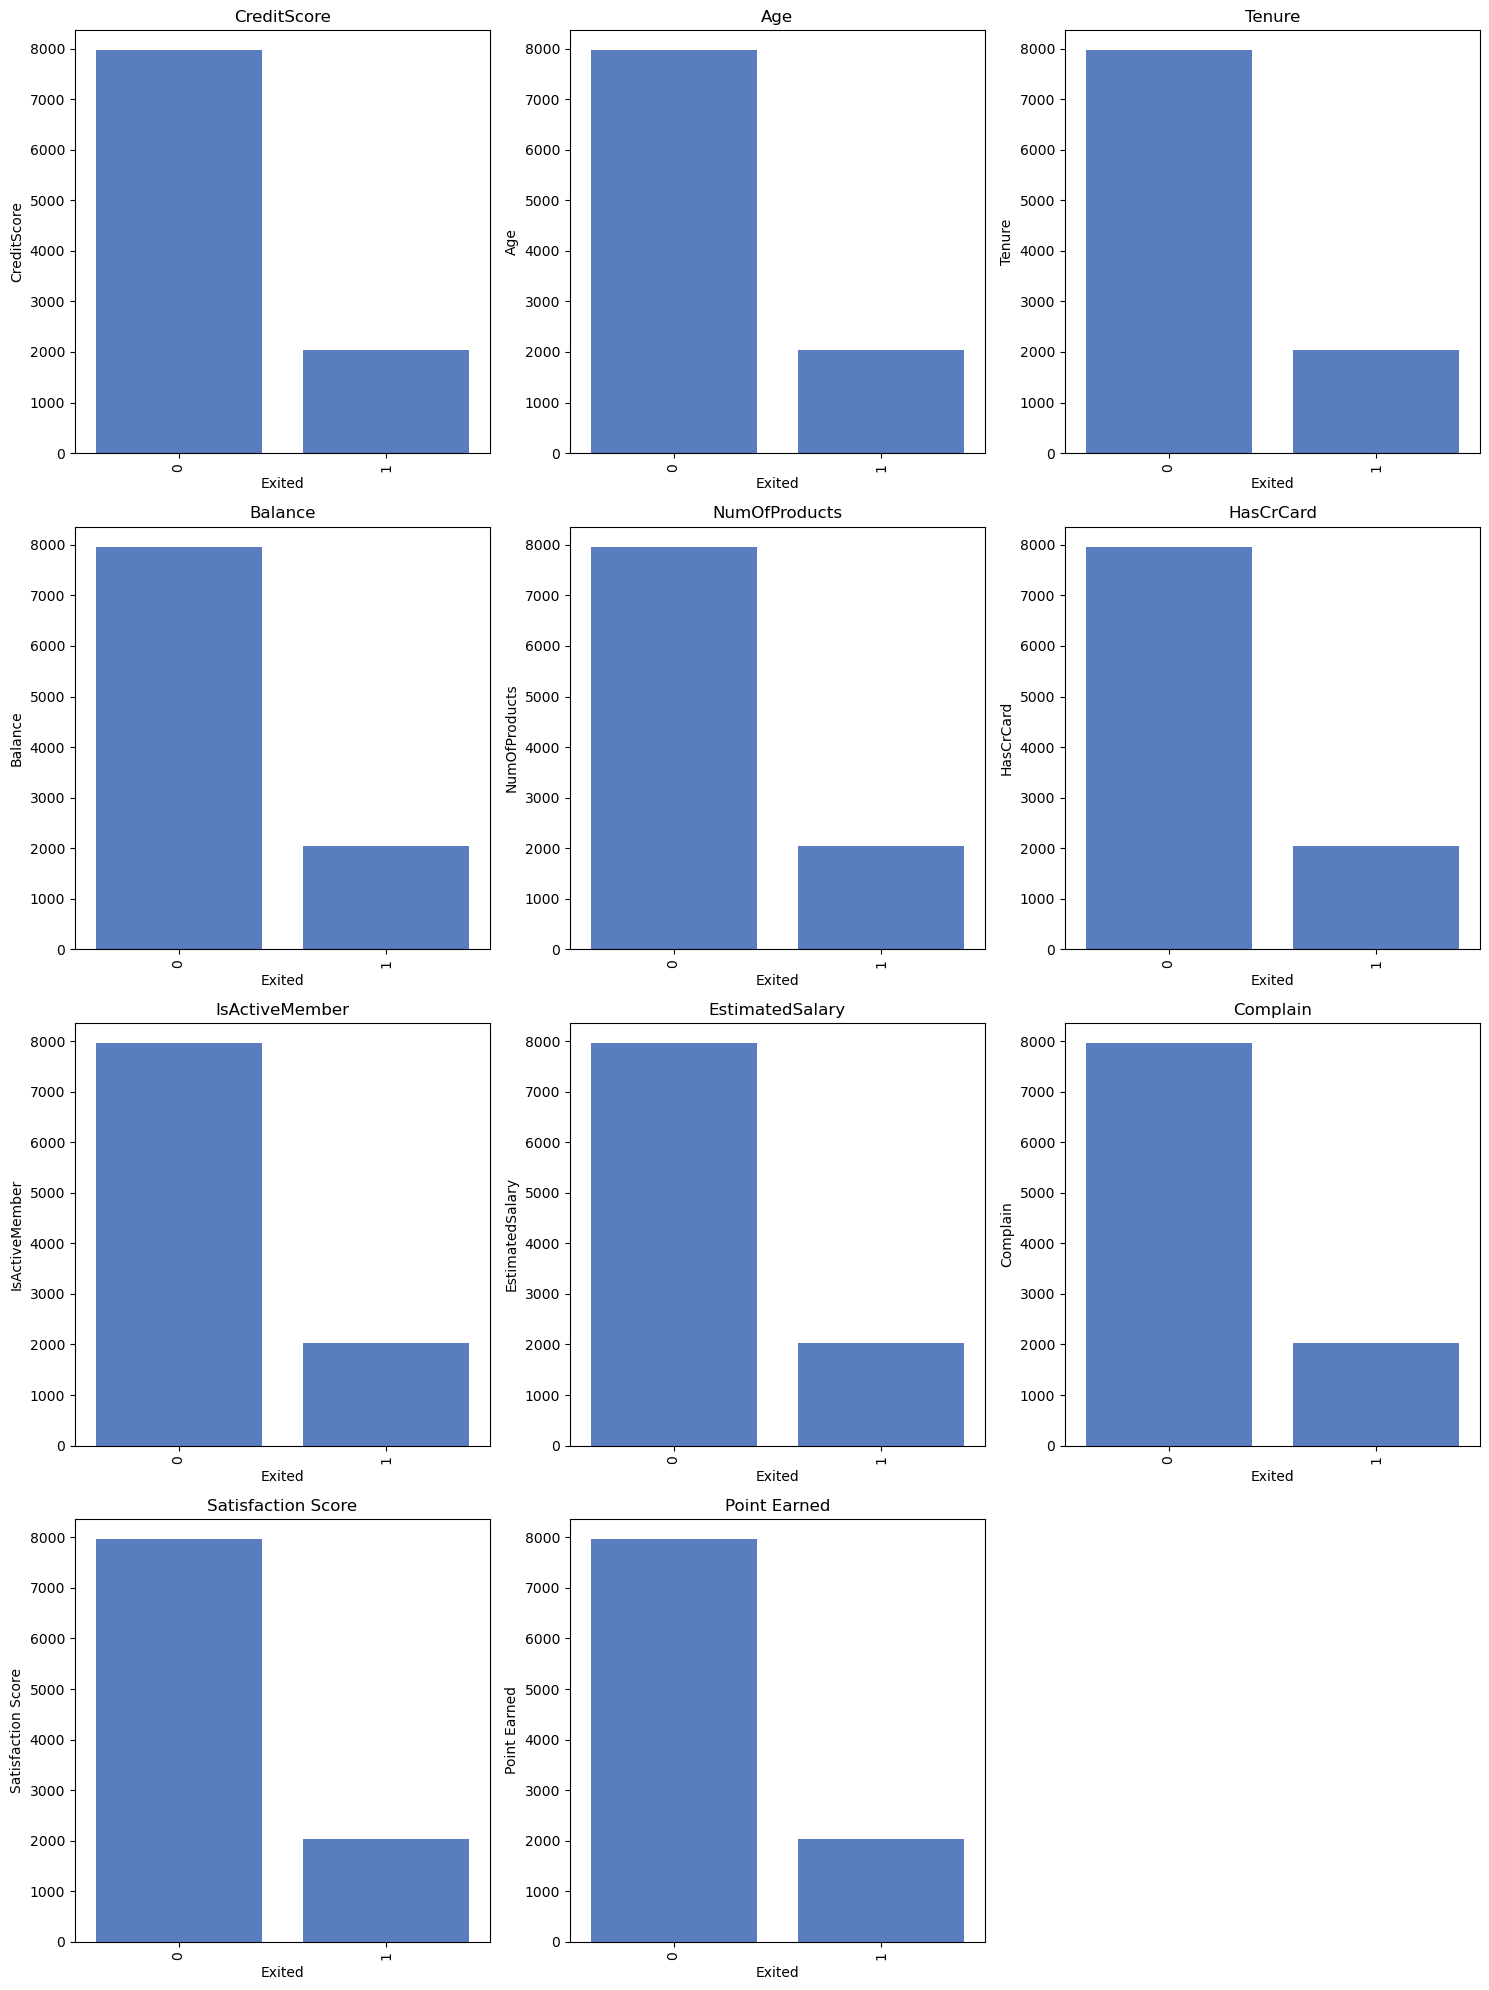

In [87]:
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))  # Dynamic figure size
axes = axes.flatten()

for i, feature in enumerate(numcols):
    df_grp = df.groupby('Exited')[feature].count().reset_index()
    sns.barplot(data=df_grp, y=feature,x='Exited', ax=axes[i])
    axes[i].set_title(feature)
    axes[i].tick_params(axis='x', rotation=90)

# Turn off unused axes
for i in range(len(numcols), len(axes)):
    axes[i].axis('off') 
plt.tight_layout()
plt.show()

In [101]:
df.groupby('Exited').count().reset_index()

,Exited,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,0,7962,7962,7962,7962,7962,7962,7962,7962,7962,7962,7962,7962,7962,7962,7962,7962,7962
1,1,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038,2038


In [91]:
# looks imbalance dataset, need to split and analyze 
exited = df[df['Exited'] == 1]
notExited = df[df['Exited'] == 0]
print(exited.shape,notExited.shape)

(2038, 18) (7962, 18)


In [93]:
exited.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,2038.000000,2.038000e+03,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.000000,2038.0,2038.000000,2038.000000,2038.000000
mean,4908.406771,1.569006e+07,645.414622,44.835623,4.934740,91109.476006,1.475466,0.699215,0.360648,101509.908783,1.0,0.998037,2.997547,604.448479
std,2868.353597,7.267539e+04,100.337351,9.759754,2.936768,58346.483197,0.801408,0.458712,0.480306,57932.623392,0.0,0.044270,1.399381,225.315301
min,1.000000,1.556571e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,1.0,0.000000,1.000000,163.000000
25%,2421.250000,1.562744e+07,578.000000,38.000000,2.000000,38591.222500,1.000000,0.000000,0.000000,51924.020000,1.0,1.000000,2.000000,405.000000
50%,4875.500000,1.568902e+07,646.000000,45.000000,5.000000,109344.230000,1.000000,1.000000,0.000000,102489.335000,1.0,1.000000,3.000000,610.500000
75%,7419.750000,1.575302e+07,716.000000,51.000000,8.000000,131423.637500,2.000000,1.000000,1.000000,152443.857500,1.0,1.000000,4.000000,793.000000
max,9999.000000,1.581566e+07,850.000000,84.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199808.100000,1.0,1.000000,5.000000,1000.000000


In [103]:
notExited.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,7962.000000,7.962000e+03,7962.000000,7962.000000,7962.000000,7962.000000,7962.000000,7962.000000,7962.000000,7962.000000,7962.0,7962.000000,7962.000000,7962.000000
mean,5024.072720,1.569117e+07,651.837855,37.408063,5.032781,72742.750663,1.544210,0.707109,0.554635,99726.853141,0.0,0.001256,3.017960,607.044084
std,2891.330469,7.174861e+04,95.650047,10.125957,2.880496,62851.577108,0.509542,0.455118,0.497037,57399.956717,0.0,0.035420,1.407645,226.091682
min,2.000000,1.556570e+07,405.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,90.070000,0.0,0.000000,1.000000,119.000000
25%,2526.250000,1.562882e+07,585.000000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,50783.295000,0.0,0.000000,2.000000,412.000000
50%,5041.500000,1.569152e+07,653.000000,36.000000,5.000000,92063.060000,2.000000,1.000000,1.000000,99620.355000,0.0,0.000000,3.000000,603.000000
75%,7524.750000,1.575336e+07,718.000000,41.000000,7.000000,126419.330000,2.000000,1.000000,1.000000,148602.445000,0.0,0.000000,4.000000,801.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,10.000000,221532.800000,3.000000,1.000000,1.000000,199992.480000,0.0,1.000000,5.000000,1000.000000


In [105]:
# make the dataset balance

df_sample = notExited.sample(2038)
df_sample.shape

(2038, 18)

In [109]:
df_merge = pd.concat([exited,df_sample],axis=0)
df_merge.shape

(4076, 18)

In [111]:
df_merge

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
16,17,15737452,Romeo,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,0,2,SILVER,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,1650,15569423,Cunningham,731,Spain,Male,41,4,0.00,2,1,0,22299.27,0,0,1,GOLD,968
7030,7031,15610042,Brown,574,France,Male,33,8,100267.03,1,1,0,103006.27,0,0,2,DIAMOND,949
9142,9143,15663312,Marino,494,France,Female,35,9,112727.06,2,1,0,183752.91,0,0,2,DIAMOND,697
51,52,15768193,Trevisani,585,Germany,Male,36,5,146050.97,2,0,0,86424.57,0,0,3,SILVER,665


In [115]:
df_merge.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [117]:
df_merge.shape

(4076, 15)

In [119]:
numcols = [x for x in df_merge.columns if df_merge[x].dtype != 'object']
numcols

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Complain',
 'Satisfaction Score',
 'Point Earned']

In [121]:
num_features = len(numcols)
rows = np.ceil(np.sqrt(num_features)).astype(int)
cols = np.ceil(num_features / rows).astype(int)
print(rows,cols)

4 3


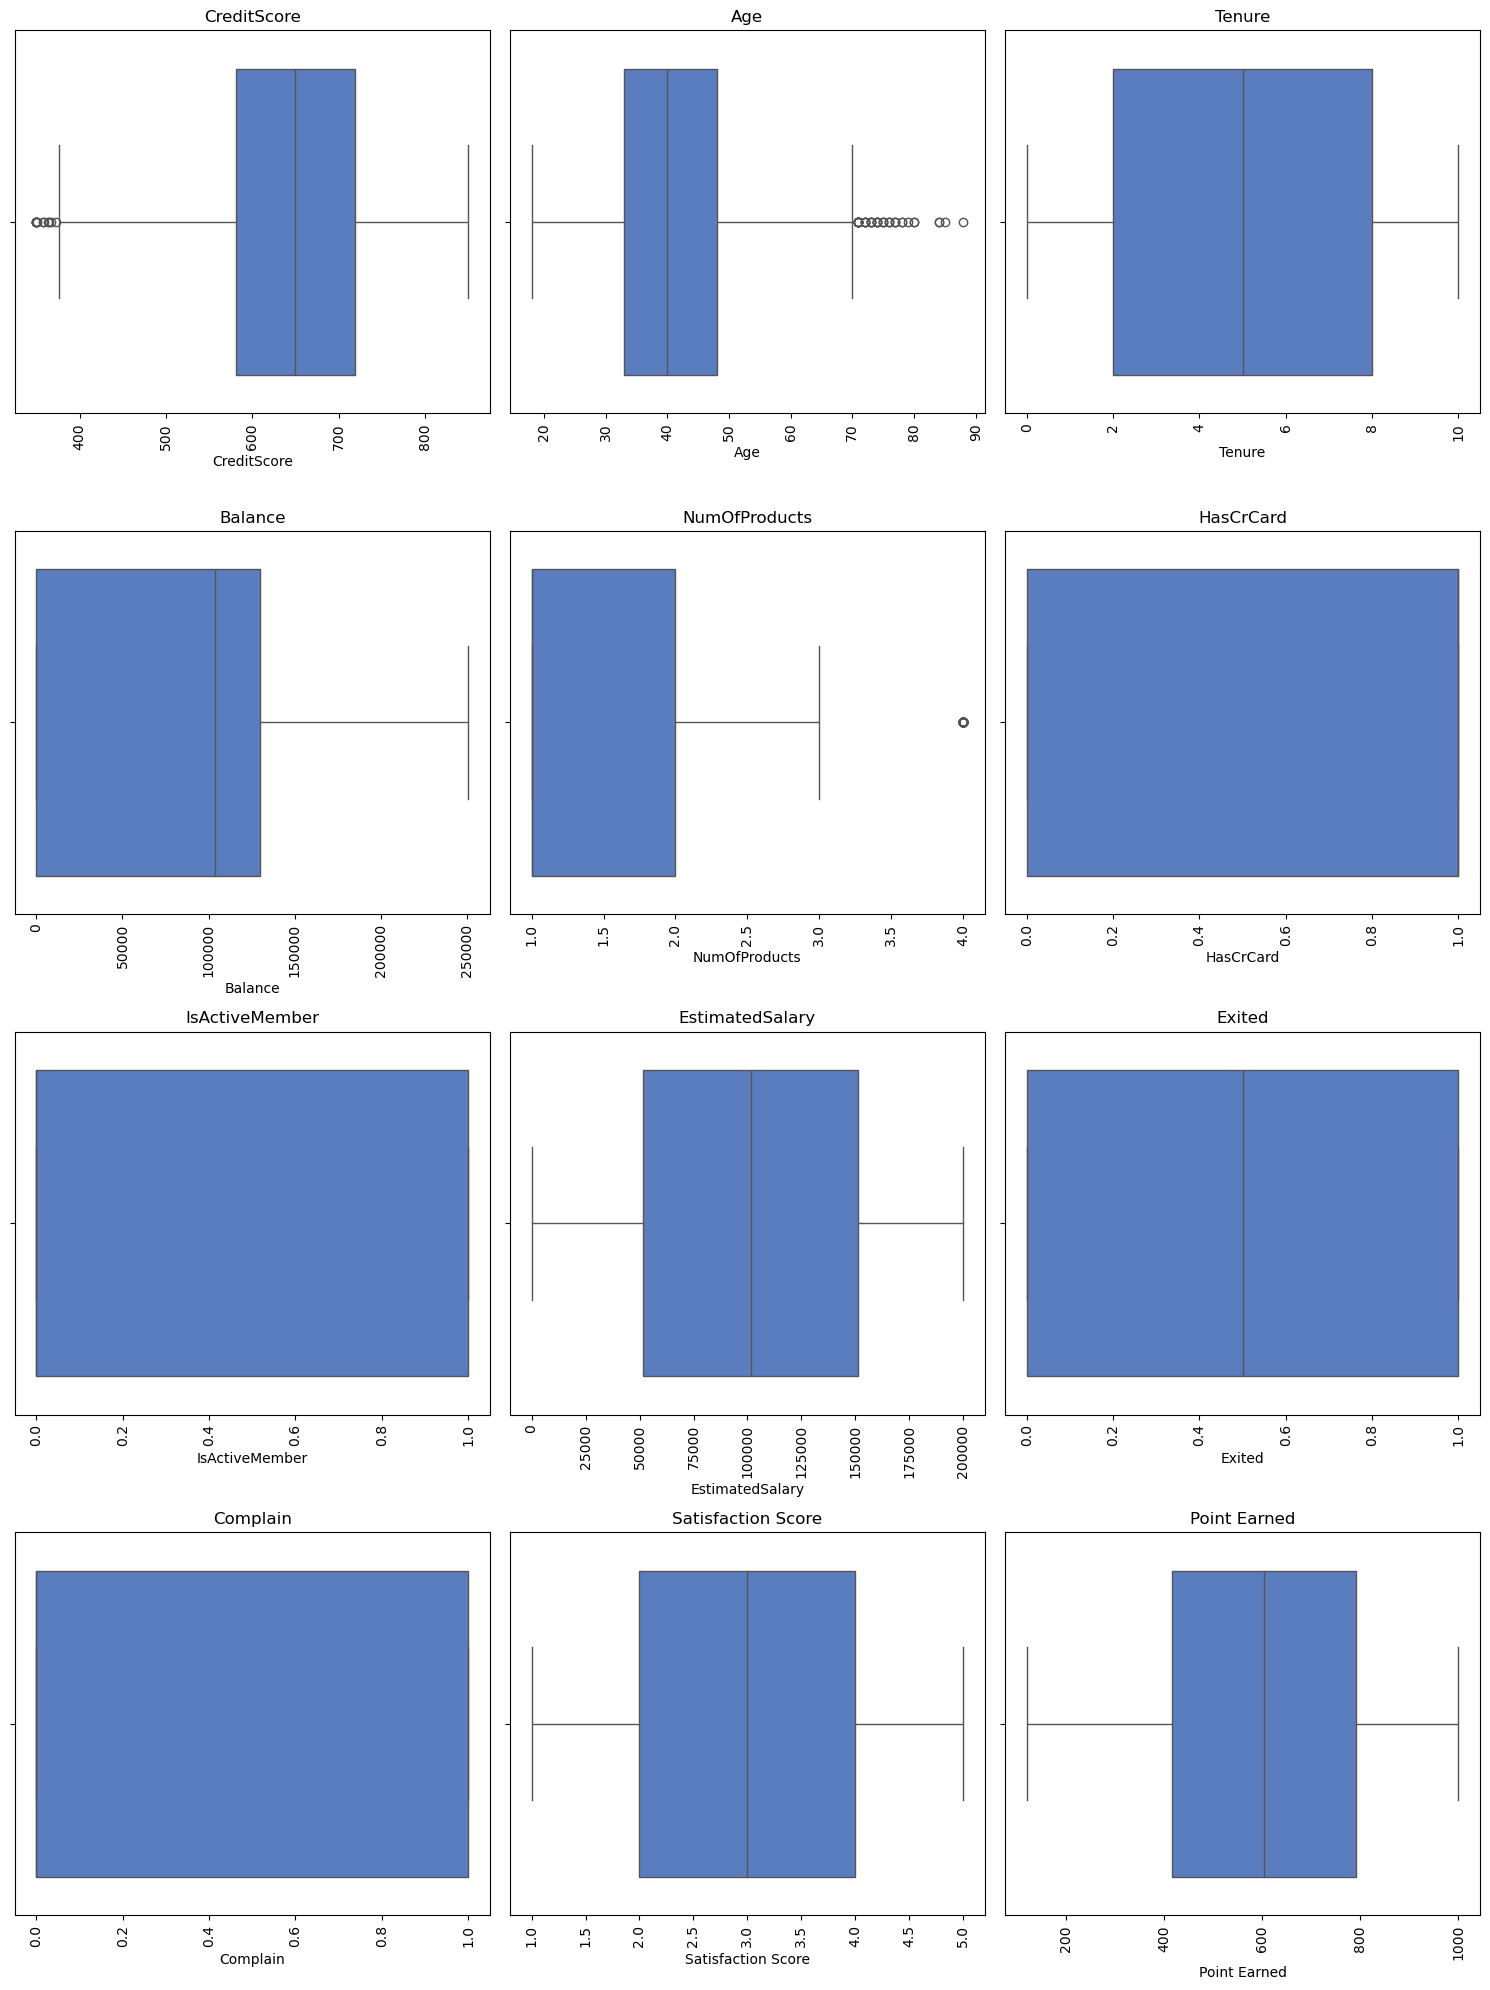

In [123]:
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))  # Dynamic figure size
axes = axes.flatten()

for i, feature in enumerate(numcols):
    sns.boxplot(data=df_merge, x=feature, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].tick_params(axis='x', rotation=90)

# Turn off unused axes
for i in range(len(numcols), len(axes)):
    axes[i].axis('off') 
plt.tight_layout()
plt.show()

In [125]:
# removing outliers in age a creditscore
df_merge['CreditScore'].quantile(q=[i / 100 for i in range(0, 101, 5)])

0.00    350.00
0.05    486.75
0.10    520.00
0.15    543.00
0.20    562.00
0.25    581.00
0.30    597.00
0.35    611.00
0.40    625.00
0.45    637.00
0.50    650.00
0.55    664.00
0.60    678.00
0.65    691.00
0.70    705.00
0.75    719.00
0.80    735.00
0.85    754.00
0.90    779.00
0.95    815.25
1.00    850.00
Name: CreditScore, dtype: float64

In [127]:
df_merge['Age'].quantile(q=[i / 100 for i in range(0, 101, 5)])

0.00    18.0
0.05    26.0
0.10    29.0
0.15    30.0
0.20    32.0
0.25    33.0
0.30    35.0
0.35    36.0
0.40    37.0
0.45    39.0
0.50    40.0
0.55    41.0
0.60    43.0
0.65    44.0
0.70    46.0
0.75    48.0
0.80    50.0
0.85    52.0
0.90    56.0
0.95    61.0
1.00    88.0
Name: Age, dtype: float64

In [139]:
upper_value = df_merge['Age'].quantile(0.95)
upper_value

61.0

In [141]:
df1 = df_merge[df_merge['Age'] <= upper_value]
df1.shape

(3888, 15)

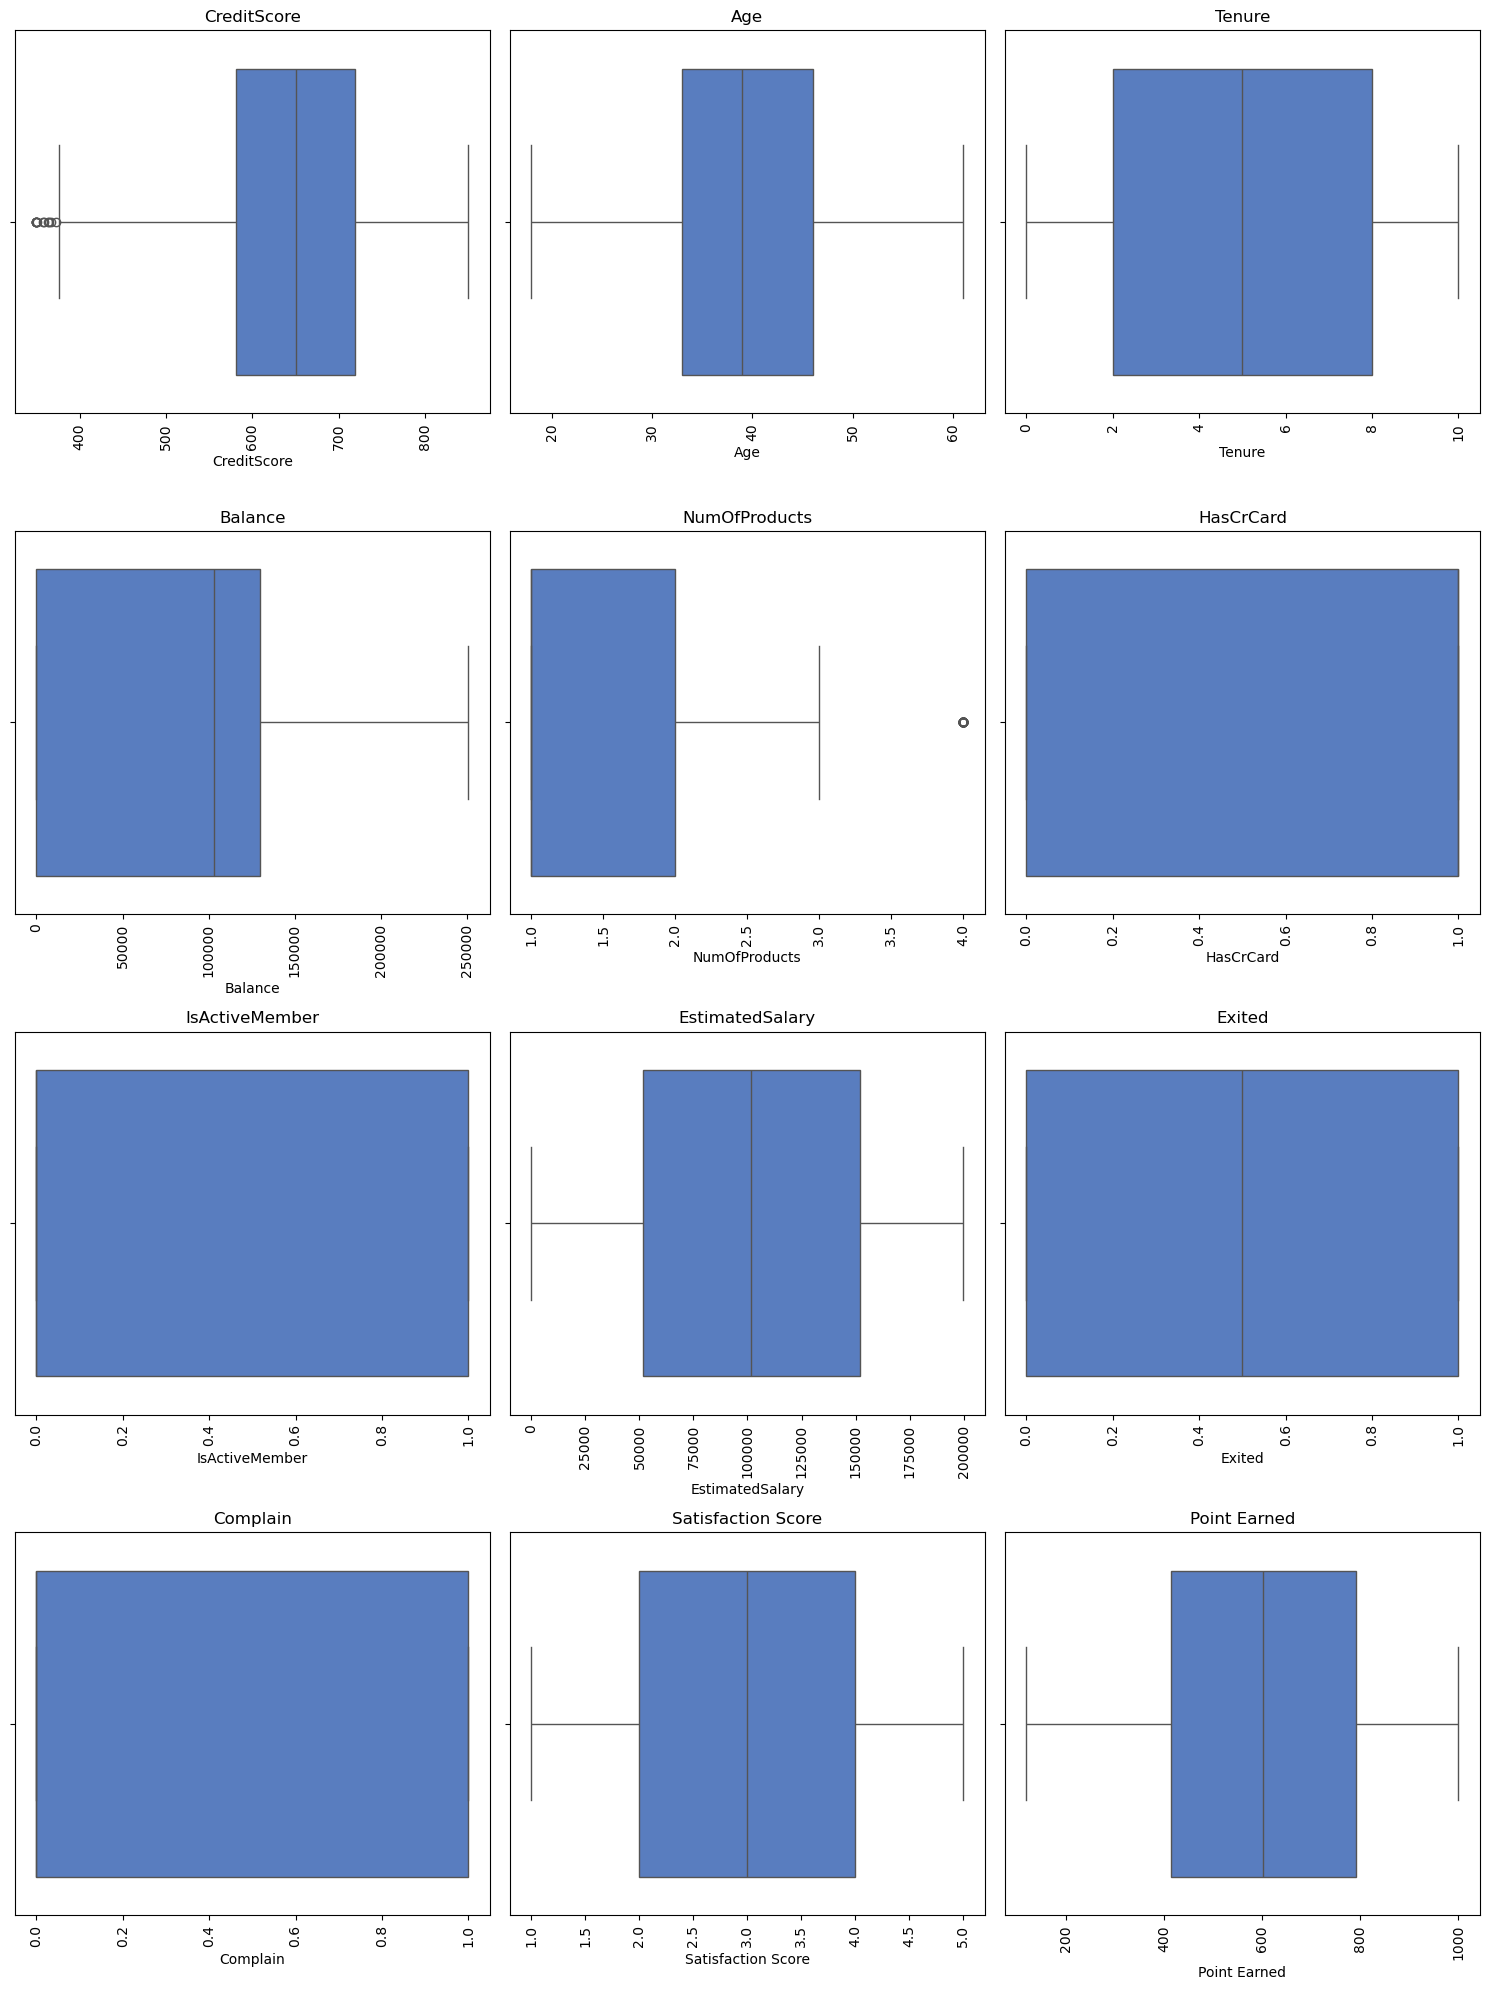

In [145]:
fig, axes = plt.subplots(rows, cols, figsize=(5 * cols, 5 * rows))  # Dynamic figure size
axes = axes.flatten()

for i, feature in enumerate(numcols):
    sns.boxplot(data=df1, x=feature, ax=axes[i])
    axes[i].set_title(feature)
    axes[i].tick_params(axis='x', rotation=90)

# Turn off unused axes
for i in range(len(numcols), len(axes)):
    axes[i].axis('off') 
plt.tight_layout()
plt.show()

In [147]:
df1

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,1,5,DIAMOND,484
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2,DIAMOND,282
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1,0,2,SILVER,163
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6985,825,France,Male,32,9,0.00,2,0,0,9751.03,0,0,5,PLATINUM,583
1649,731,Spain,Male,41,4,0.00,2,1,0,22299.27,0,0,1,GOLD,968
7030,574,France,Male,33,8,100267.03,1,1,0,103006.27,0,0,2,DIAMOND,949
9142,494,France,Female,35,9,112727.06,2,1,0,183752.91,0,0,2,DIAMOND,697


In [149]:
# frequency encoding
import json

def save_dict_to_json(dictionary, file_name):
    """
    Save a dictionary to a JSON file.

    Parameters:
    dictionary (dict): The dictionary to save.
    file_name (str): The name of the JSON file.
    """
    try:
        with open(file_name, 'w') as json_file:
            json.dump(dictionary, json_file, indent=4)  # Format the JSON file for readability
        print(f"Dictionary successfully saved to {file_name}!")
    except Exception as e:
        print(f"An error occurred: {e}")

In [151]:
# storing dictionary for the cateogrical features
def freq_encoding(col_list,df):
    new_df = pd.DataFrame()
    for col in col_list:
        freq_dict = df[col].value_counts().to_dict()
        save_dict_to_json(freq_dict,f'{col}.json')
        new_df[col] = df[col].map(freq_dict)
    return new_df

In [153]:
catcols = [x for x in df1.columns if df1[x].dtype == 'object']
catcols

['Geography', 'Gender', 'Card Type']

In [155]:
encoded_df = freq_encoding(catcols,df1)
encoded_df.shape

Dictionary successfully saved to Geography.json!
Dictionary successfully saved to Gender.json!
Dictionary successfully saved to Card Type.json!


(3888, 3)

In [157]:
encoded_df.head(10)

,Geography,Gender,Card Type
0,1821,1923,1011
2,1821,1923,1011
5,883,1965,1011
7,1184,1923,1011
16,1184,1965,973
22,883,1923,1011
30,883,1923,1011
35,1821,1923,1011
41,1821,1923,973
43,1821,1923,945


In [159]:
df1.drop(columns=catcols,inplace=True)

C:\Users\yashw\AppData\Local\Temp\ipykernel_18608\1369755264.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(columns=catcols,inplace=True)


In [161]:
df1

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377
5,645,44,8,113755.78,2,1,0,149756.71,1,1,5,484
7,376,29,4,115046.74,4,1,0,119346.88,1,1,2,282
16,653,58,1,132602.88,1,1,0,5097.67,1,0,2,163
...,...,...,...,...,...,...,...,...,...,...,...,...
6985,825,32,9,0.00,2,0,0,9751.03,0,0,5,583
1649,731,41,4,0.00,2,1,0,22299.27,0,0,1,968
7030,574,33,8,100267.03,1,1,0,103006.27,0,0,2,949
9142,494,35,9,112727.06,2,1,0,183752.91,0,0,2,697


In [207]:
df2 = pd.concat([df1,encoded_df],axis=1)
df2.shape

(3888, 15)

In [209]:
df2

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography,Gender,Card Type
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,1821,1923,1011
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,1821,1923,1011
5,645,44,8,113755.78,2,1,0,149756.71,1,1,5,484,883,1965,1011
7,376,29,4,115046.74,4,1,0,119346.88,1,1,2,282,1184,1923,1011
16,653,58,1,132602.88,1,1,0,5097.67,1,0,2,163,1184,1965,973
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6985,825,32,9,0.00,2,0,0,9751.03,0,0,5,583,1821,1965,959
1649,731,41,4,0.00,2,1,0,22299.27,0,0,1,968,883,1965,945
7030,574,33,8,100267.03,1,1,0,103006.27,0,0,2,949,1821,1965,1011
9142,494,35,9,112727.06,2,1,0,183752.91,0,0,2,697,1821,1923,1011


In [167]:
df2.corr()['Exited']

CreditScore          -0.041093
Age                   0.426002
Tenure               -0.011117
Balance               0.134257
NumOfProducts        -0.051965
HasCrCard             0.003363
IsActiveMember       -0.173818
EstimatedSalary       0.007982
Exited                1.000000
Complain              0.997429
Satisfaction Score   -0.000184
Point Earned         -0.007024
Geography            -0.091673
Gender               -0.128094
Card Type             0.023454
Name: Exited, dtype: float64

In [169]:
# tring scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [181]:
numcols = ['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Complain',
 'Satisfaction Score',
 'Point Earned']

In [183]:
scaled_values = scaler.fit_transform(df2[numcols])

In [185]:
scaled_df = pd.DataFrame(scaled_values,columns=numcols)
scaled_df.shape

(3888, 11)

In [187]:
scaled_df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned
0,-0.310306,0.225990,-1.010614,-1.348372,-0.755783,0.656899,1.112229,0.002888,1.001544,-0.719771,-0.629472
1,-1.494996,0.225990,1.031447,1.255941,2.215383,0.656899,-0.899095,0.219942,1.001544,-0.006058,-1.020161
2,-0.047042,0.443209,1.031447,0.507160,0.729800,0.656899,-0.899095,0.837932,1.001544,1.421368,-0.539659
3,-2.770816,-1.185933,-0.329927,0.528217,3.700965,0.656899,-0.899095,0.313357,1.001544,-0.719771,-1.446776
4,0.033963,1.963742,-1.350957,0.814585,-0.755783,0.656899,-0.899095,-1.657463,-0.998458,-0.719771,-1.981166
...,...,...,...,...,...,...,...,...,...,...,...
3883,1.775558,-0.860104,1.371791,-1.348372,0.729800,-1.522303,-0.899095,-1.577192,-0.998458,1.421368,-0.095082
3884,0.823756,0.117381,-0.329927,-1.348372,0.729800,0.656899,-0.899095,-1.360732,-0.998458,-1.433483,1.633829
3885,-0.765956,-0.751495,1.031447,0.287137,-0.755783,0.656899,-0.899095,0.031478,-0.998458,-0.719771,1.548506
3886,-1.576001,-0.534276,1.371791,0.490380,0.729800,0.656899,-0.899095,1.424373,-0.998458,-0.719771,0.416856


In [189]:
scaled_df['Exited'] = df2['Exited']

In [191]:
scaled_df.corr()['Exited']

CreditScore          -0.017487
Age                  -0.044182
Tenure                0.011905
Balance               0.023198
NumOfProducts        -0.022615
HasCrCard            -0.008713
IsActiveMember       -0.026468
EstimatedSalary      -0.015033
Complain             -0.058642
Satisfaction Score   -0.039545
Point Earned          0.022984
Exited                1.000000
Name: Exited, dtype: float64

In [193]:
# using df2 as final data for PCA

In [195]:
df2.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography,Gender,Card Type
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,1821,1923,1011
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,1821,1923,1011
5,645,44,8,113755.78,2,1,0,149756.71,1,1,5,484,883,1965,1011
7,376,29,4,115046.74,4,1,0,119346.88,1,1,2,282,1184,1923,1011
16,653,58,1,132602.88,1,1,0,5097.67,1,0,2,163,1184,1965,973
22,510,38,4,0.00,1,1,0,118913.53,1,1,2,887,883,1923,1011
30,591,39,3,0.00,3,1,0,140469.38,1,1,3,298,883,1923,1011
35,475,45,0,134264.04,1,1,0,27822.99,1,1,1,877,1821,1923,1011
41,465,51,8,122522.32,1,0,0,181297.65,1,1,5,828,1821,1923,973
43,834,49,2,131394.56,1,0,0,194365.76,1,1,2,567,1821,1923,945


In [211]:
df2['log_creditscore'] = np.log(df2['CreditScore'])
df2['sqrtBalance'] = np.sqrt(df2['Balance'])
df2['sqrtEstimatedSalary'] = np.log(df2['EstimatedSalary'])

In [213]:
df2.head(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography,Gender,Card Type,log_creditscore,sqrtBalance,sqrtEstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,1821,1923,1011,6.428105,0.000000,11.526324
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,1821,1923,1011,6.218600,399.575775,11.643353
5,645,44,8,113755.78,2,1,0,149756.71,1,1,5,484,883,1965,1011,6.469250,337.277008,11.916767
7,376,29,4,115046.74,4,1,0,119346.88,1,1,2,282,1184,1923,1011,5.929589,339.185407,11.689789
16,653,58,1,132602.88,1,1,0,5097.67,1,0,2,163,1184,1965,973,6.481577,364.146784,8.536539
22,510,38,4,0.00,1,1,0,118913.53,1,1,2,887,883,1923,1011,6.234411,0.000000,11.686152
30,591,39,3,0.00,3,1,0,140469.38,1,1,3,298,883,1923,1011,6.381816,0.000000,11.852745
35,475,45,0,134264.04,1,1,0,27822.99,1,1,1,877,1821,1923,1011,6.163315,366.420578,10.233618
41,465,51,8,122522.32,1,0,0,181297.65,1,1,5,828,1821,1923,973,6.142037,350.031884,12.107895
43,834,49,2,131394.56,1,0,0,194365.76,1,1,2,567,1821,1923,945,6.726233,362.483876,12.177497


In [215]:
df2.corr()['Exited']

CreditScore           -0.041093
Age                    0.426002
Tenure                -0.011117
Balance                0.134257
NumOfProducts         -0.051965
HasCrCard              0.003363
IsActiveMember        -0.173818
EstimatedSalary        0.007982
Exited                 1.000000
Complain               0.997429
Satisfaction Score    -0.000184
Point Earned          -0.007024
Geography             -0.091673
Gender                -0.128094
Card Type              0.023454
log_creditscore       -0.043971
sqrtBalance            0.140474
sqrtEstimatedSalary    0.008915
Name: Exited, dtype: float64

In [275]:
df2.columns

Index(['Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'Exited', 'Complain', 'Satisfaction Score', 'Point Earned', 'Geography',
       'Gender', 'Card Type', 'log_creditscore', 'sqrtBalance',
       'sqrtEstimatedSalary'],
      dtype='object')

In [217]:
df2.drop(columns=['CreditScore','Balance','EstimatedSalary'],inplace=True)

In [279]:
df3 = df2.drop(columns=['Tenure','HasCrCard','sqrtEstimatedSalary','log_creditscore','Card Type','Point Earned','NumOfProducts'])
df3.shape

(3888, 8)

In [281]:
df3

,Age,IsActiveMember,Exited,Complain,Satisfaction Score,Geography,Gender,sqrtBalance
0,42,1,1,1,2,1821,1923,0.000000
2,42,0,1,1,3,1821,1923,399.575775
5,44,0,1,1,5,883,1965,337.277008
7,29,0,1,1,2,1184,1923,339.185407
16,58,0,1,0,2,1184,1965,364.146784
...,...,...,...,...,...,...,...,...
6985,32,0,0,0,5,1821,1965,0.000000
1649,41,0,0,0,1,883,1965,0.000000
7030,33,0,0,0,2,1821,1965,316.649696
9142,35,0,0,0,2,1821,1923,335.748507


In [197]:
from sklearn.decomposition import PCA

In [247]:
pca = PCA(0.95)

In [283]:
X = df3.drop(columns=['Exited'])
y = df3['Exited']

In [285]:
X_pca = pca.fit_transform(X)

In [287]:
X_pca.shape

(3888, 2)

In [289]:
X_pca

array([[ 426.23882775, -199.3433706 ],
       [ 391.06308486,  198.67958609],
       [-537.85709035,   54.01796962],
       ...,
       [ 398.32368825,  116.01505986],
       [ 396.68667428,  135.08072537],
       [-241.9722619 ,  125.20809195]])

In [291]:
pca.components_

array([[-6.53219755e-04,  4.71753797e-05, -1.21033274e-04,
        -1.81936202e-05,  9.96116783e-01, -1.08594424e-03,
        -8.80325578e-02],
       [ 2.73565210e-03, -5.73717917e-05,  3.79424262e-04,
         1.38498979e-04,  8.80331746e-02, -8.47945474e-04,
         9.96113342e-01]])

In [293]:
pca.explained_variance_ratio_

array([0.85736727, 0.13978287])

In [295]:
loadings = pd.DataFrame(pca.components_, columns=X.columns, index=[f'PC{i+1}' for i in range(pca.n_components_)])
loadings

,Age,IsActiveMember,Complain,Satisfaction Score,Geography,Gender,sqrtBalance
PC1,-0.000653,0.000047,-0.000121,-0.000018,0.996117,-0.001086,-0.088033
PC2,0.002736,-0.000057,0.000379,0.000138,0.088033,-0.000848,0.996113


In [317]:
scaler=StandardScaler()

In [321]:
X_scaled = scaler.fit_transform(X)

In [297]:
from sklearn.model_selection import train_test_split

In [323]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,stratify=y,random_state=42)

In [301]:
from sklearn.linear_model import LogisticRegression

In [303]:
lr = LogisticRegression()

In [325]:
lr.fit(X_train,y_train)

LogisticRegression()

In [327]:
lr.score(X_test,y_test)

0.9974293059125964

In [329]:
y_pred = lr.predict(X_test)

In [331]:
from sklearn.metrics import accuracy_score

In [351]:
train_pred = lr.predict(X_train)

In [355]:
train_accuracy = accuracy_score(y_train,train_pred)

In [357]:
train_accuracy

0.9990353697749196

In [359]:
test_accuracy = accuracy_score(y_test,y_pred)

In [361]:
test_accuracy

0.9974293059125964

In [365]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X, y, cv=5, scoring='accuracy')
print("Cross-validation accuracy: ", scores.mean())

Cross-validation accuracy:  0.9987139912589784


C:\Users\yashw\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yashw\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [367]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='binary')  # Use 'macro' or 'weighted' for multiclass
print(f"Precision: {precision}")

Precision: 0.9974293059125964


In [369]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='binary')  # Use 'macro' or 'weighted' for multiclass
print(f"Recall: {recall}")


Recall: 0.9974293059125964


In [371]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='binary')  # Use 'macro' or 'weighted' for multiclass
print(f"F1-Score: {f1}")


F1-Score: 0.9974293059125964


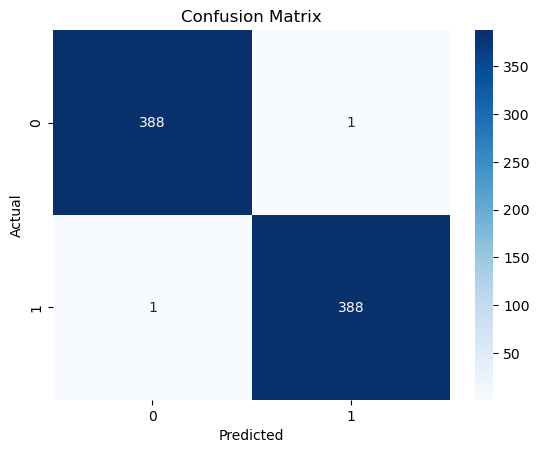

In [375]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lr.classes_, yticklabels=lr.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [377]:
from sklearn.metrics import roc_auc_score
y_proba = lr.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC: {roc_auc}")

ROC-AUC: 0.9990549890629853


In [379]:
from sklearn.metrics import log_loss
logloss = log_loss(y_test, y_proba)
print(f"Log-Loss: {logloss}")

Log-Loss: 0.01708603115407727


In [381]:
import pickle

In [383]:
with open('model_v1.pkl', 'wb') as file:
    pickle.dump(lr, file)

In [385]:
with open('scaler_v1.pkl', 'wb') as file:
    pickle.dump(scaler, file)